In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

from scipy import signal
from scipy.fft import fft, fftfreq

figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'Frequency (Hz)')

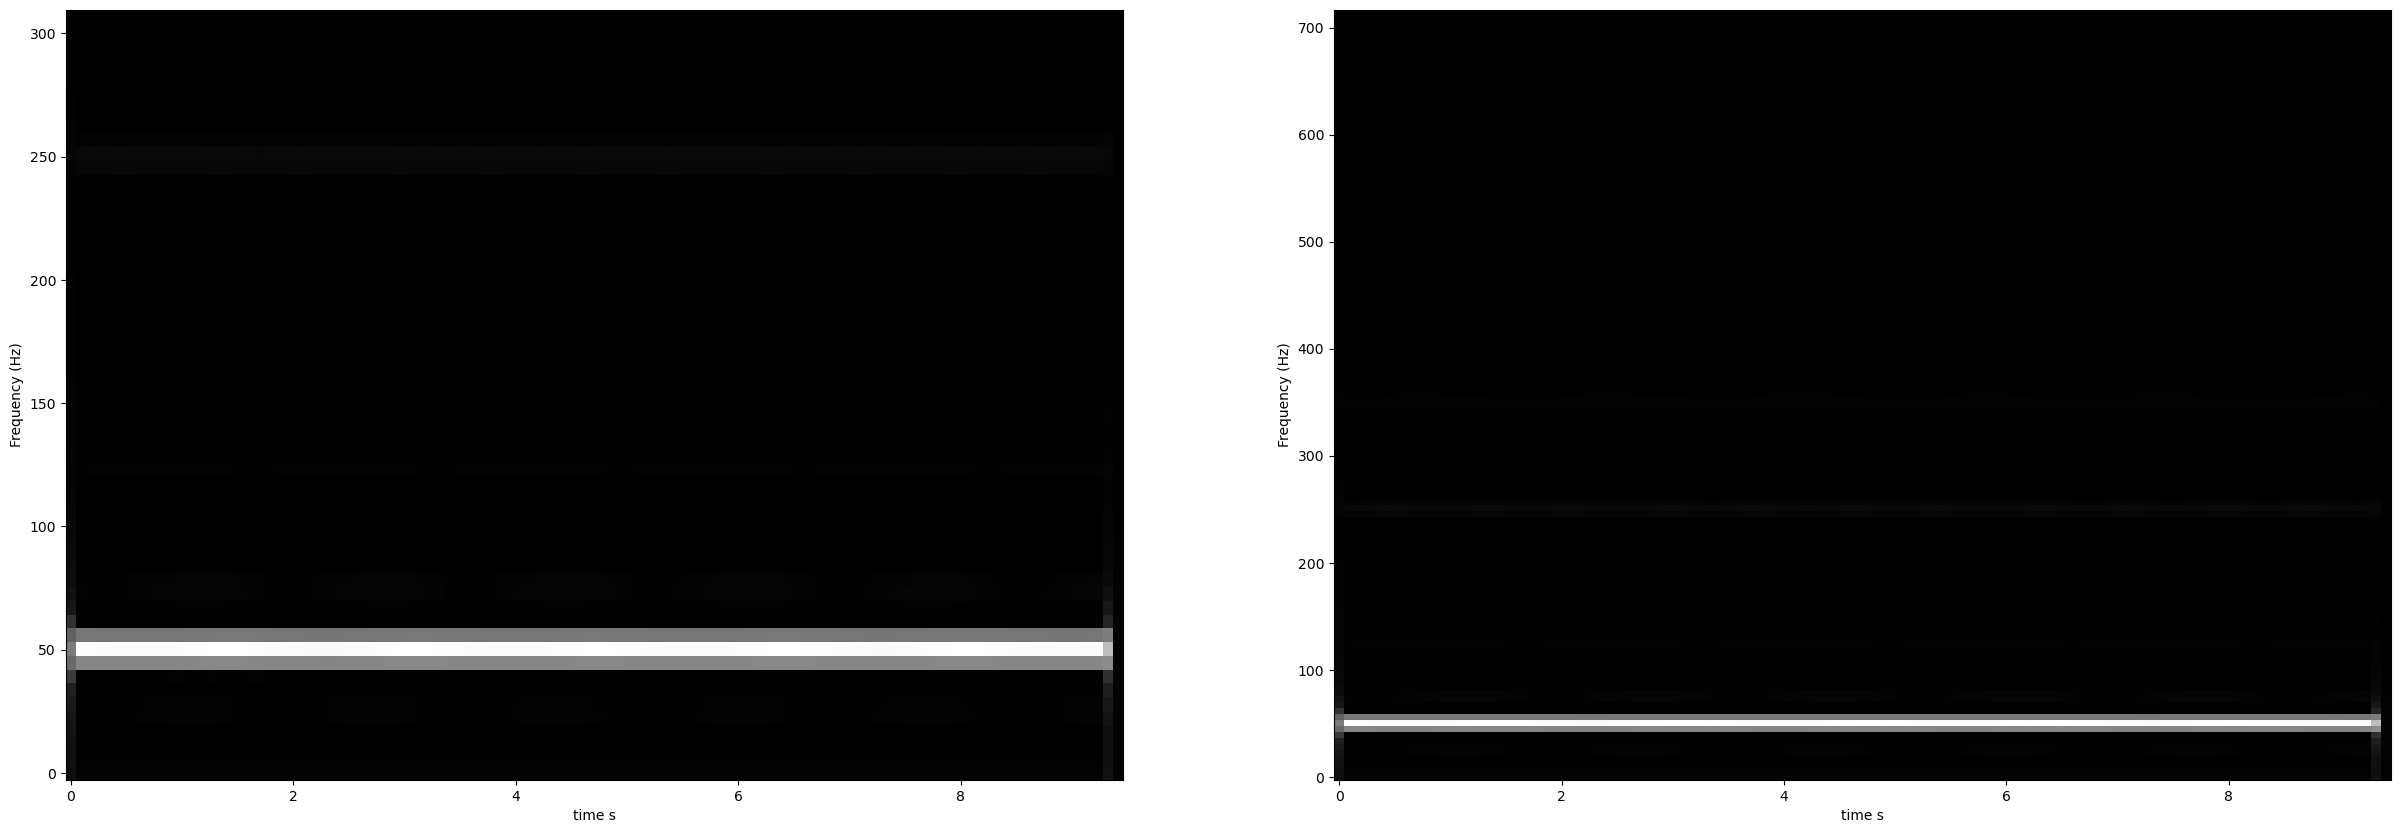

In [68]:
cc = pd.read_csv('/kaggle/input/ccs170/ccs170.csv')
# cc = pd.read_csv('/kaggle/input/ccsv122/ccs122.csv')
# cc = pd.read_csv('/kaggle/input/ccs001/mcsadc-motor-rotorbarfailure-1_2023/ccs10.csv')

cc.columns = ['time', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'rad/s', 'pos/mec' ]
ia = cc['ia']

ia = np.array(ia)

fs = 1428
f,t,sxx = signal.stft(ia, fs=fs)
plt.subplot(121)
plt.pcolormesh(t, f[:56], np.abs(sxx[:56, :]), cmap='gray')
plt.xlabel("time s")
plt.ylabel("Frequency (Hz)")

plt.subplot(122)
plt.pcolormesh(t, f, np.abs(sxx), cmap='gray')
plt.xlabel("time s")
plt.ylabel("Frequency (Hz)")

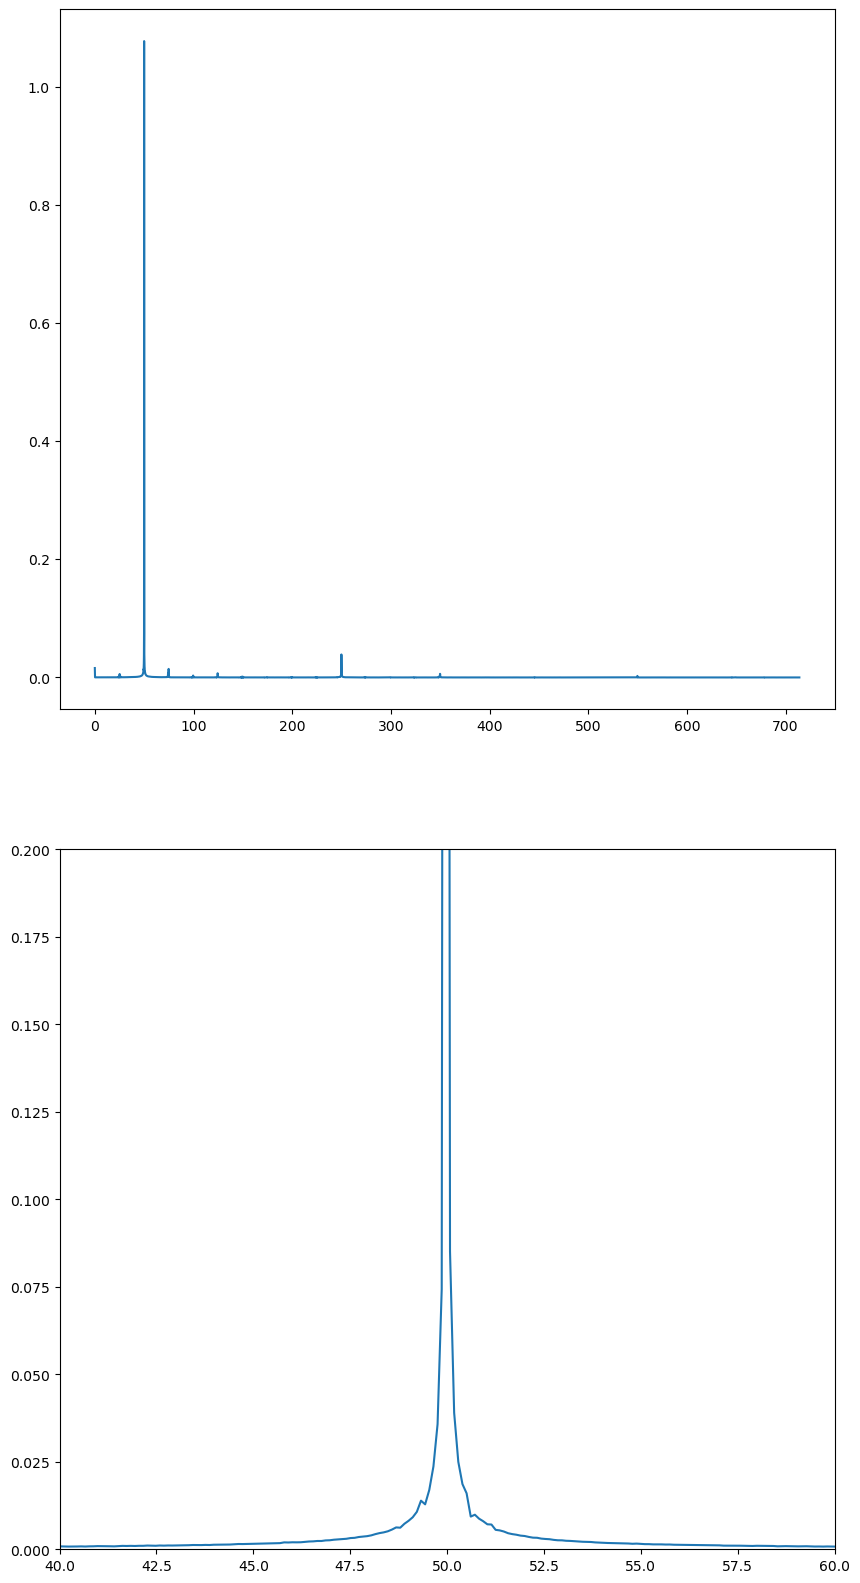

In [30]:

ib = np.array(cc['ib'])
yb = fft(ib, norm="forward")
xb = fftfreq(len(ib), 1.0/1428.0)

plt.subplot(211)
plt.plot(xb[0:len(ib)//2], np.abs(yb[0:len(ib)//2]))


perfft = ((len(xb)) / 1428.0)
plt.subplot(212)
plt.xlim(40, 60)
plt.ylim(0, 0.2)
plt.plot(xb[0:len(ib)//2], np.abs(yb[0:len(ib)//2]))
# plt.plot(range(round(perfft*60),len(xb)//2), np.abs(yb[round(perfft*60):len(yb)//2]))


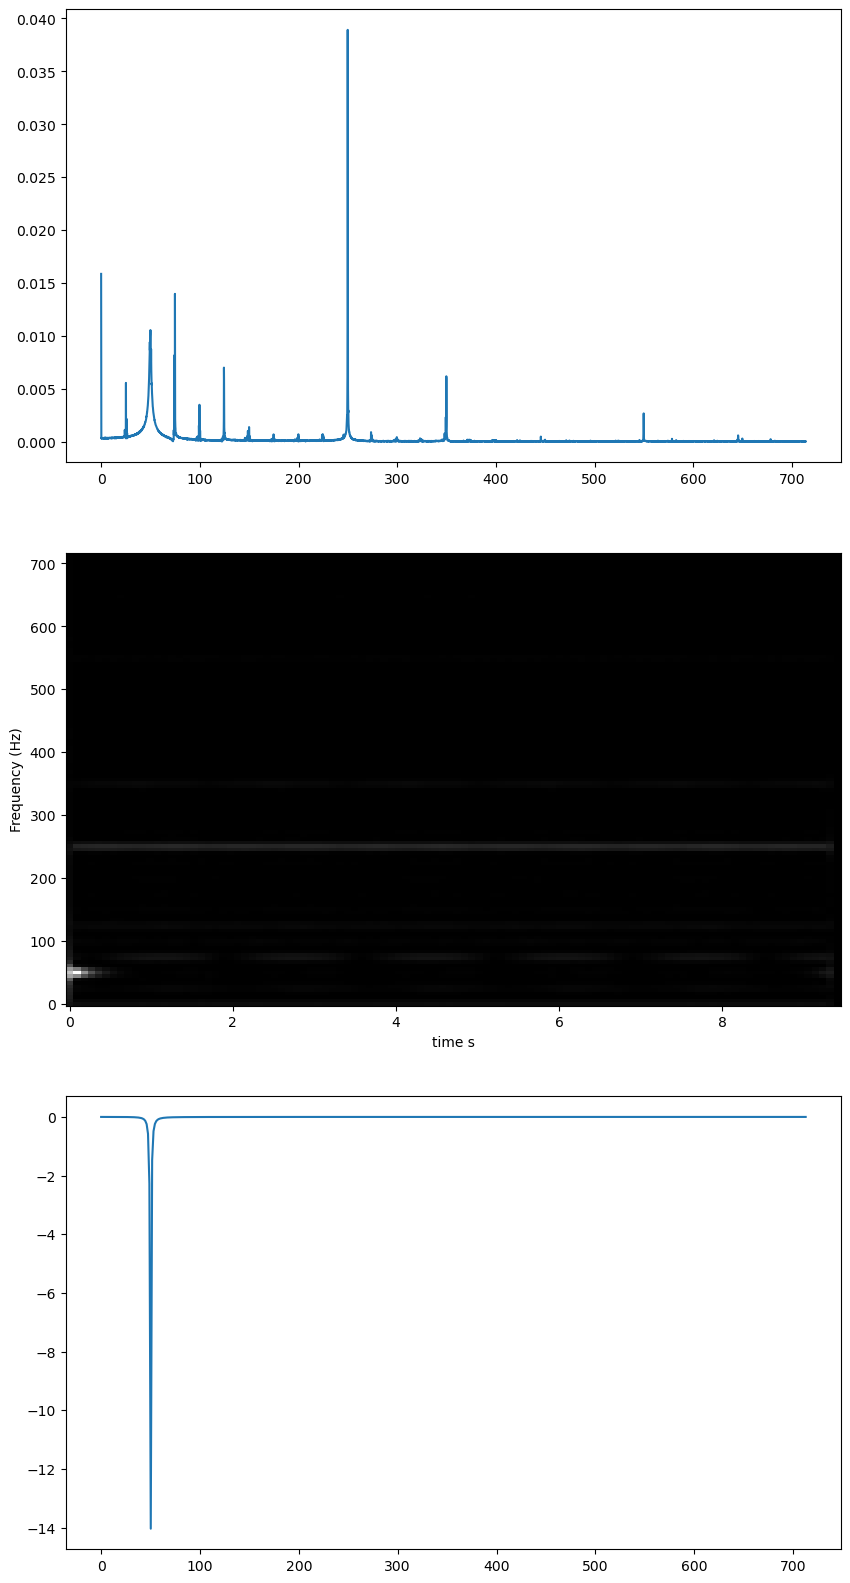

In [69]:
fs = 1428.0
f0 = 50.0
q  = 25

bNumerator, aDenominator = signal.iirnotch(f0, q, fs)

ibFiltered = signal.filtfilt(bNumerator, aDenominator, ib)

cc1 = pd.read_csv('/kaggle/input/ccs001/mcsadc-motor-rotorbarfailure-1_2023/ccs10.csv')

cc1.columns = ['time', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'rad/s', 'pos/mec' ]
ia = cc['ia']
iHealtyFiltered = signal.filtfilt(bNumerator, aDenominator, ia)
yhealty = fft(iHealtyFiltered, norm='forward')
xhealty = fftfreq(len(iHealtyFiltered), 1.0/fs)#[0:len(xbf)//2]

ybf = fft(ibFiltered, norm='forward')
xbf = fftfreq(len(ibFiltered), 1.0/fs)#[0:len(xbf)//2]

plt.rcParams["figure.figsize"] = (10,20)

plt.subplot(311)
plt.plot(xbf[0:len(xbf)//2], np.abs(ybf[0:len(ybf)//2]))

f,t,sxx = signal.stft(ibFiltered, fs=fs)
plt.subplot(312)
plt.pcolormesh(t, f, np.abs(sxx), cmap='gray')
plt.xlabel("time s")
plt.ylabel("Frequency (Hz)")

plt.subplot(313)
f, h = signal.freqz(bNumerator, aDenominator, fs=fs)
plt.plot(f, 20*np.log10(abs(h)))



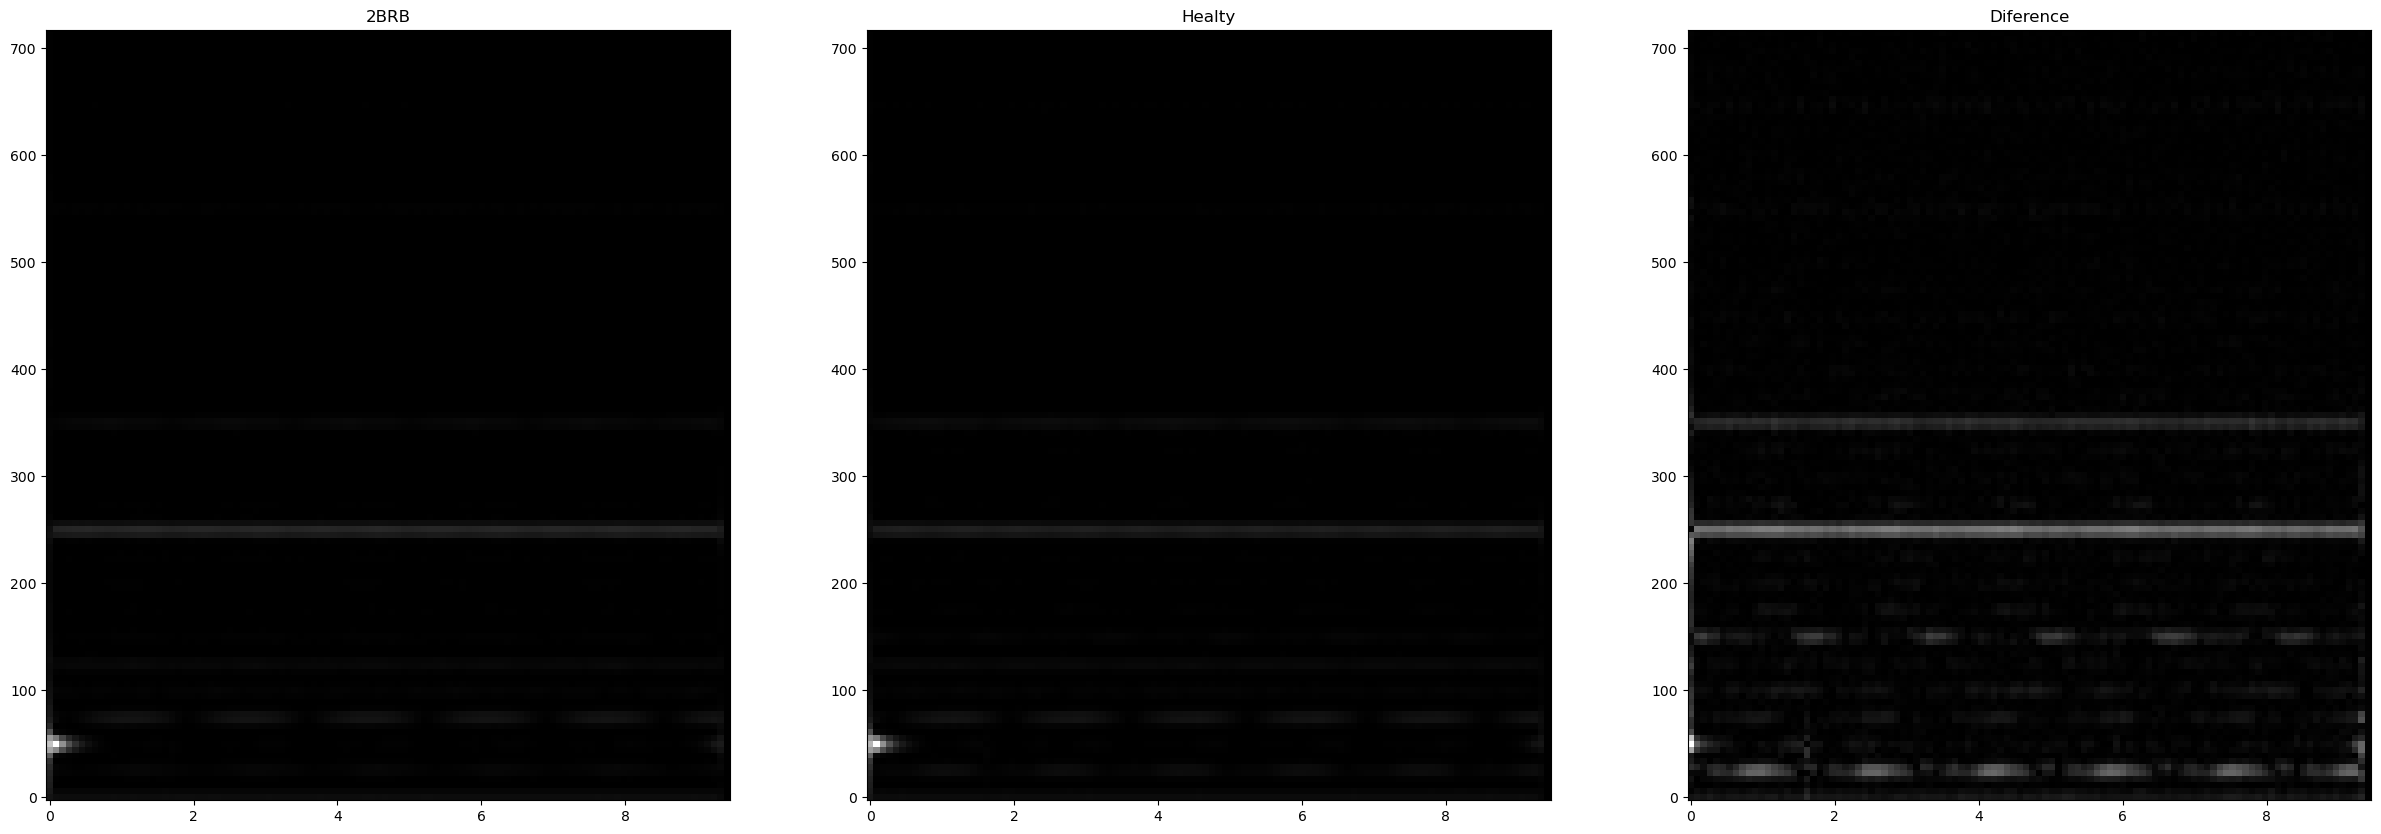

In [72]:
deviation = yhealty-yb

plt.rcParams["figure.figsize"] = (30,10)

f,t,sxx = signal.stft(ibFiltered, fs=fs)
f1,t1,sxx1 = signal.stft(iHealtyFiltered, fs=fs)

diference = np.abs(sxx) - np.abs(sxx1)

plt.subplot(131)
plt.title("2BRB")
plt.pcolormesh(t,f, abs(sxx), cmap='gray')

plt.subplot(132)
plt.title("Healty")
plt.pcolormesh(t1,f1, abs(sxx1), cmap='gray')

plt.subplot(133)
plt.title("Diference")
plt.pcolormesh(t,f, np.abs(diference), cmap='gray')


(array([[2.44289277e-05, 2.40892750e-05, 2.36020660e-05, ...,
         2.64540061e-05, 2.39341284e-05, 2.48073332e-05],
        [1.16453246e-05, 1.39493065e-05, 1.13264636e-05, ...,
         1.23098007e-05, 1.35459880e-05, 1.22571437e-05],
        [3.85720606e-08, 1.08444951e-08, 1.51821475e-08, ...,
         1.17165476e-07, 6.98240819e-08, 2.06197347e-09],
        ...,
        [2.77048016e-09, 1.06732109e-08, 7.68573034e-10, ...,
         7.62742217e-09, 4.04538625e-09, 5.28309973e-09],
        [2.75919881e-09, 1.73771873e-09, 1.51876677e-08, ...,
         1.30152120e-10, 4.49700538e-09, 2.10801210e-09],
        [8.18027296e-10, 2.39616258e-10, 7.32718078e-09, ...,
         8.54252371e-10, 3.25106865e-10, 1.76748741e-10]]),
 array([  0.      ,   5.578125,  11.15625 ,  16.734375,  22.3125  ,
         27.890625,  33.46875 ,  39.046875,  44.625   ,  50.203125,
         55.78125 ,  61.359375,  66.9375  ,  72.515625,  78.09375 ,
         83.671875,  89.25    ,  94.828125, 100.40625 , 105.9

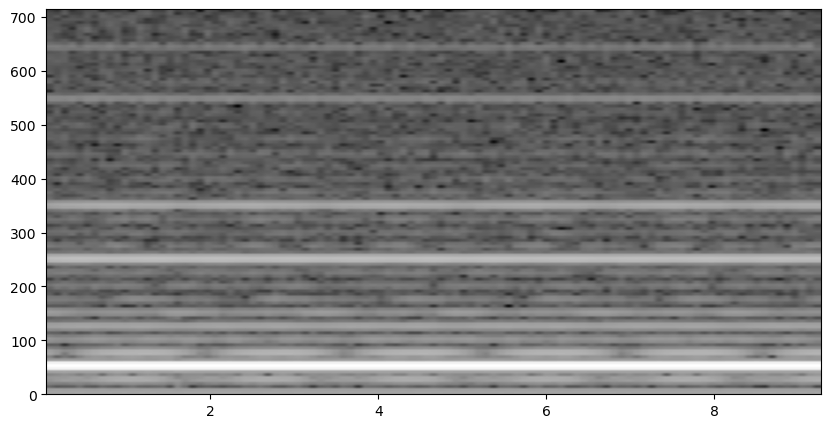

In [81]:
plt.rcParams['figure.figsize'] = (10,5)
plt.specgram(ia, Fs=fs, scale='dB', cmap='gray')

# Gradio Learning Section 


In [93]:
! pip install gradio

In [97]:
%reload_ext gradio
# %load_ext gradio

In [98]:
%%blocks

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

import gradio as gr
def markPort(port):
    if port == '':
        return
    
    return f"port: {port}"

def plot_forecast(final_year, companies, noise, show_legend, point_style):
    start_year = 2020
    x = np.arange(start_year, final_year + 1)
    year_count = x.shape[0]
    plt_format = ({"cross": "X", "line": "-", "circle": "o--"})[point_style]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, company in enumerate(companies):
        series = np.arange(0, year_count, dtype=float)
        series = series**2 * (i + 1)
        series += np.random.rand(year_count) * noise
        ax.plot(x, series, plt_format)
    if show_legend:
        plt.legend(companies)
    return fig


gr.Markdown("# MoMos - Motor Monitoring System Dashboard")
# bl = gr.Blocks()
with bl:
    
    with gr.Tab("Setting"):
        with gr.Column():
            gr.Markdown("### Port: ")
            portRadio = gr.Radio(['com5', 'com6', 'com7', 'com8', 'com9'], label="Choose")
            port = gr.Textbox(show_label=False, max_lines=1, placeholder="Choose or insert")
            displayPort = gr.Markdown()
            
            portRadio.change(markPort, portRadio, displayPort)
            port.submit(markPort, port, displayPort)
            
    with gr.Tab("Display"):
        with gr.Column():
            gr.Markdown("### display plot Here!!")
            year = gr.Radio([2025, 2030, 2035, 2040], label="Project to:")
            group = gr.CheckboxGroup(["Google", "Microsoft", "Gradio"], label="Company Selection")
            noise = gr.Slider(1, 100, label="Noise Level")
            showLegend = gr.Checkbox(label="Show Legend")
            style = gr.Dropdown(["cross", "line", "circle"], label="Style")
            
            showPlot = gr.Button("Plot")
            
            plotPlace = gr.Plot(label="forecast")
            
            showPlot.click(plot_forecast,inputs=[year,group,noise,showLegend,style],outputs=plotPlace)
# bl.launch(share=True)

Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://e1ce1cac127686c412.gradio.live


## issues: https://github.com/gradio-app/gradio/issues/3625

sepertinya gradio tidak bisa mendeteksi library yang sudah diimport hanya ketika menggunakan `%%blocks` saja, ketika langsung menggunakan `Block().Launch` gradio bekerja dengan semestinya.
